# STAT207 Mini-Project #1 - Fraud Recruitment Analysis


By Alejandra Arias

In [2]:
#Imports here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## <u>Introduction</u>: Recruitment Fraud
For this report, the following question will be answered: "How does the nature of the relationship between **FRAUDULENT** and **SALARY** change for different values of **FUNCTION** in the dataset?

This dataset contains the following variables:
* `title`: Job title on posting
* `location`: Where "Job" is located
* `department`: Job Department
* `salary_range`: Range of salary expected for position
* `company_profile`: An "About Me" from the "company"
* `description`: Description on job posting
* `requirements`: Requirements on job posting
* `benefits`: description of the benefits of working
* `telecommuting`: True or False question
* `has_company_logo`: True or False question
* `has_questions`: True or False question
* `has_employment_type`: True or False question
* `required_experience`: True or False question
* `required_education`: True or False question
* `industry`
* `function`: True or False question
* `fraudulent`: True or False question
* `in_balanced_dataset`: True or False question

We will be specifically looking into the relationship of `fraudulent`, `salary`, and `function` of each fraudulent recruitment post made, if any. The motivation for this is analysis is based off the fact that every year, thousands of job-seekers come across these malicious ads so it's important to analyze how they might look like and what relationships common fraudlent postings have to their location, salary, and department of the posting. This analysis will be helpful to companies looking to see what kind of scam recruiment posts are made and what they could do to set themselves apart. This could also be helpful to job seekers who are looking to avoid being scammed from such malicious posts. It would also be important to note that on the Kraggle website, there was a snapshot of the data where "Not Applicable" was seen throughout the data which is why there's preliminary NaN values.

## 2. Dataset Discussion

In [3]:
df=pd.read_csv('fraud_dataset.csv', na_values=['Not Applicable'])

In [4]:
df.head()

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,in_balanced_dataset
0,Marketing Intern,"US, NY, New York",Marketing,NaN,"<h3>We're Food52, and we've created a groundbr...","<p>Food52, a fast-growing, James Beard Award-w...",<ul>\r\n<li>Experience with content management...,NaN,f,t,f,Other,Internship,NaN,NaN,Marketing,f,f
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"<h3>90 Seconds, the worlds Cloud Video Product...",<p>Organised - Focused - Vibrant - Awesome!<br...,<p><b>What we expect from you:</b></p>\r\n<p>Y...,<h3><b>What you will get from us</b></h3>\r\n<...,f,t,f,Full-time,NaN,NaN,Marketing and Advertising,Customer Service,f,f
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,<h3></h3>\r\n<p>Valor Services provides Workfo...,"<p>Our client, located in Houston, is actively...",<ul>\r\n<li>Implement pre-commissioning and co...,NaN,f,t,f,NaN,NaN,NaN,NaN,NaN,f,f
3,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,<p>Our passion for improving quality of life t...,<p><b>THE COMPANY: ESRI – Environmental System...,<ul>\r\n<li>\r\n<b>EDUCATION: </b>Bachelor’s o...,<p>Our culture is anything but corporate—we ha...,f,t,f,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,f,f
4,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,<p>SpotSource Solutions LLC is a Global Human ...,<p><b>JOB TITLE:</b> Itemization Review Manage...,<p><b>QUALIFICATIONS:</b></p>\r\n<ul>\r\n<li>R...,<p>Full Benefits Offered</p>,f,t,t,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,f,f


In [5]:
originalrows=df.shape[0]

In [6]:
originalrows

17880

The dataset used was found on [Kraggle](https://www.kaggle.com/datasets/amruthjithrajvr/recruitment-scam). It came from The Employment Scam Aegean Dataset which is a publically avilable dataset containing 17,880 real-life job ads. The record were classified in two categories, fraudulent and non-fraudulent, where 17015 were legitimate and 866 were fraudulent postings. Dataset was downloaded on 09/18/2023

The rows in the dataset are pretty specific. They represent a lot of categories to really narrow down any differences there are from fraudulent to real recruiment postings. For example, they have the description, company profile description, if the company has a logo posted, salary, degree range seeking, experience seeking, etc. I think there could have been some variables to consider such as how many people applied to the position, assuming we can see that number. I think it's representative, but there are some factors that would have been nice to consider. Another factor could have been US Work authorization because this is something you can easily fact-check. The actions the audience may take after considering more vairables to make the dataset more effective is most likely take everything with a grain of salt and look for more datasets that can be representative of all real and fake recruitment posts. The three variables I intend to explore in this analysis, as mentioned previously, is the salary, whether post is fraudulent, and the function. The salary would help to see how fake posts use the salary, if they do, compared to function/type of job.

## 3. Dataset Cleaning

In [12]:
fraud_df=df[['salary_range','fraudulent', 'function']]
fraud_df=fraud_df.dropna()

In [13]:
droppedrows=fraud_df.shape[0]
dropped=originalrows-droppedrows
dropped

17178

After dropping the values, it is noticable that a significant amount of rows were dropped. This is most likely due to the fact that a lot of of the salaries were NaN, as they did not include the salary range in the job posting. This decision was kept because it would be interesting to note whether there is now more fraudulent recruitments posts because of this change and how having salary affecting the dataset vs not having salary range. There is still about ~700 rows however, about ~96% of the data cut off. 

In [14]:
fraud_df.dtypes

salary_range    object
fraudulent      object
function        object
dtype: object

The salary is supposed to be a numerical value. The above shows us there is implicit missing values or a misrepresentation. After further observation, it is concluded that 'salary_range' is an object because '20000-30000' is read a string rather than a range of floats. We cannot continue our research without a numerical value, so the appropriate measures were taken. The salary object was split and make into 2 new columns to constitute 'min_salary' and 'max_salary'.

In [16]:
fraud_df[['min_salary', 'max_salary']] = fraud_df['salary_range'].str.split('-', expand=True).astype(float)

In [19]:
fraud_df=fraud_df[['min_salary', 'fraudulent', 'function']]

In [20]:
fraud_df.dtypes

min_salary    float64
fraudulent     object
function       object
dtype: object

After making both `min_salary` and `max_salary` into floats, a decision had to be made on which one to use. I first chose not to use both because it is not necessary to investigate two salaries when we're trying to compare them 2 categorical details to help us see a relationship between fraudulent and real recruitment posts. With that being said, a decision had to be made whether to choce one over the other or to add both salaries and averaging them out into a new column. I chose to go with the `min_salary` rather than averaging out for several reasons. First being, if the salaries were to be averaged out, it could potentially skew the data. The ranges of the data could be from '10000-50000' which is not representative. Furthermore, there is a lot of outliters in the data, so chosing to go with the minimum salary was ultimately the better choice to answer this research question. It is important to consider that this decision may or may not change the representation of the data, for example, if a fraudulent scam had a range of '50000-100000" or similar significant ranges, it would not be representative of how large the ranges can be for fraudulent posts as the minimum variable is being used rather than the max.

In [35]:
fraudcounts=fraud_df.groupby(['function', 'fraudulent']).size().reset_index(name='counts')
observed=fraudcounts[fraudcounts['counts'] >= 10]
fraud_df=fraud_df.merge(observed[['function','fraudulent']], on=['function','fraudulent'], how='inner')
fraud_df

,min_salary,fraudulent,function
0,20000.0,f,Management
1,50000.0,f,Management
2,80000.0,f,Management
3,40000.0,f,Management
4,25000.0,f,Management
...,...,...,...
593,100000.0,f,Project Management
594,100000.0,f,Project Management
595,60000.0,f,Project Management
596,30000.0,f,Project Management


Since the `function` and `fraud` needed to have a combination count of at least 10 observations, some rows were dropped. First, a grouby was used to make sure the combination of both categorical variables were counted correctly. Then, another variable was made to drop any rows that are equal or greater than 10 would be counted. Afterwards, the data was merged to only keep the required rows needed.

C:\Users\arias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


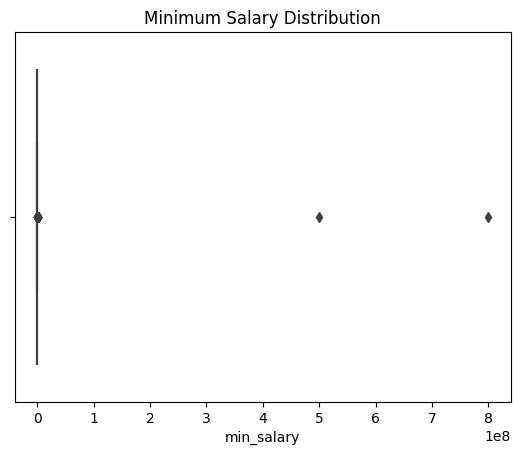

In [27]:
sns.boxplot(x=fraud_df['min_salary'])
plt.title('Minimum Salary Distribution')
plt.show()

C:\Users\arias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


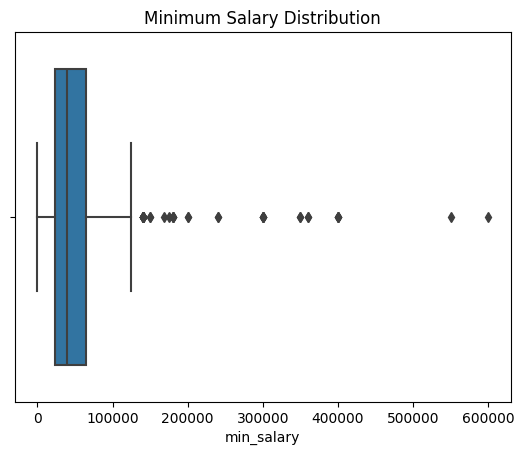

In [28]:
fraud_df=fraud_df[fraud_df['min_salary']<1000000]
sns.boxplot(x=fraud_df['min_salary'])
plt.title('Minimum Salary Distribution')
plt.show()

As seen with the boxlpots, we can see there was 2 major outliters in the data. They were at five million and eight million. The skew was so big, you couldn't even see the box, just points plotted. It was decided to cut those two outliers because they were significantly skewing the data. Only ~800 of the ~18000 rows are fraudulent so it wouldn't make sense to keep those 2 outliers if theyre fraudulent. Even if they were real postings, it still doesn't make sense to keep them because it would not be representative of the rest of the data.

In [29]:
outliers=droppedrows-fraud_df.shape[0]
outliers

2

## 4. <u>Research Question</u>: How does the Relationship between `FRAUDULENT` and `SALARY` Change based on Different Values of `FUNCTION` in the Dataset?

1. Measure of Center Comparison
2. Measure of Spread Comparison
3. Shape Comparison
4. Outliers Compairson

In [50]:
fraud_df.describe()

,min_salary
count,598.000000
mean,54493.443144
std,63027.845904
min,0.000000
25%,25000.000000
50%,40000.000000
75%,70000.000000
max,600000.000000


In [45]:
fraud_df[['fraudulent','function', 'min_salary']].groupby(['fraudulent', 'function']).median()

min_salary
fraudulent function                          
f          Administrative             29000.0
           Business Development       35000.0
           Customer Service           25000.0
           Design                     48000.0
           Engineering                70000.0
           Finance                    25000.0
           Human Resources            31500.0
           Information Technology     35000.0
           Management                 40800.0
           Marketing                  30000.0
           Other                      25000.0
           Project Management         65000.0
           Sales                      45000.0
t          Customer Service           30000.0
           Other                      70000.0

For looking at the 'Measure of Ceneter Comparison', I went with using median over mean because although the biggest outliers were dropped, some where left to keep the data representative of the overall recruitment posts. We see that the median for fraudulent posts are 'Customer Service' and 'Other'. For Customer Service, we see that the medians are about the same with only a 10000 different, whereas other for non-fraudulent was about 25000 and for fraudulent it was 70000. This is a significant difference that is important to note. Various factors could have resulted in a higher salary median but we can also assume that fraudulent scams could potentially prefer 'Other' function job roles to post their scams in.

In [48]:
fraud_df[['fraudulent', 'min_salary','function']].groupby(['fraudulent', 'function']).quantile(0.75)-fraud_df[['fraudulent', 'min_salary', 'function']].groupby(['fraudulent','function']).quantile(0.25)

min_salary
fraudulent function                          
f          Administrative             15500.0
           Business Development       29000.0
           Customer Service           15050.0
           Design                     58250.0
           Engineering                70000.0
           Finance                    18000.0
           Human Resources           109750.0
           Information Technology     20000.0
           Management                 47500.0
           Marketing                  36500.0
           Other                       3500.0
           Project Management         56250.0
           Sales                      27500.0
t          Customer Service            4000.0
           Other                      15000.0

For the Measure of Spread Comparison, we used IQR opposed to Standard Deviation because of the outliers present in the data. We can also see that some of the data did not change from the median data from above. There are various reasons as to why this may happen, such as constant values, symmetric data, specific data patterns, etc. For example, there's a chance that for `Engineering`, the 75th quartile and the 25th quartile are exactly 70000 apart, and the median happens to be 70000. 

C:\Users\arias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\arias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\arias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

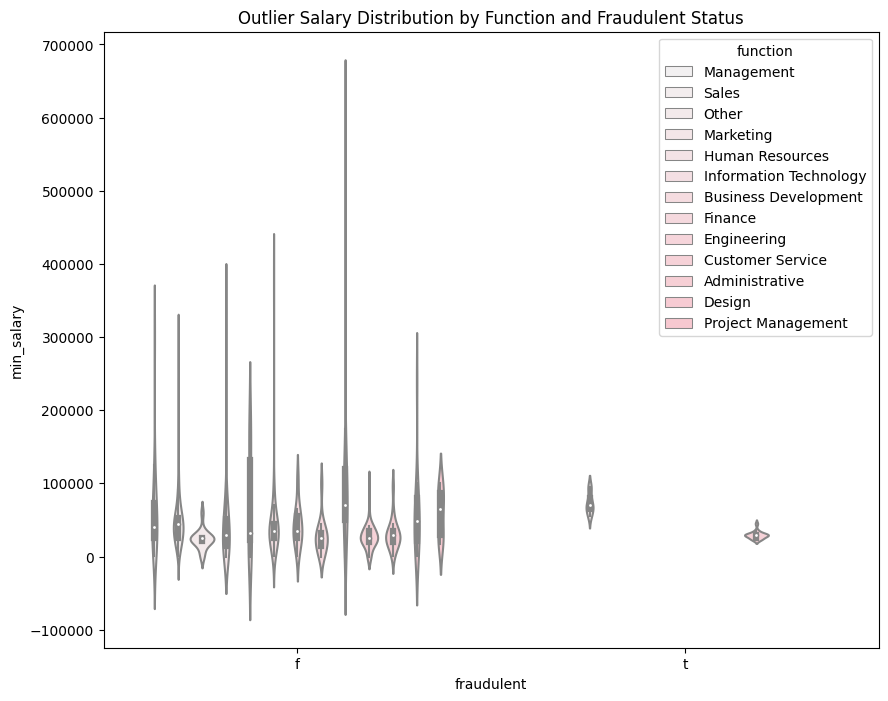

In [43]:
plt.figure(figsize=(10,8))
sns.violinplot(x='fraudulent', y='min_salary', hue='function', data=fraud_df, color='pink')
plt.title('Outlier Salary Distribution by Function and Fraudulent Status')
plt.show()

For the measure of shape, it is evident that the salary distributions are skewed right and unimodol. This is due to the many outliers left in the dataset. It is also noticable that the the real posts tend to have significantly more outliers, as the fraudulent posts don't necessarily have impactful ones. Engineering appears to have the greatest shape of all which would make sense as the market is very big and the salaries can range to six figures. 

C:\Users\arias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\arias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\arias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

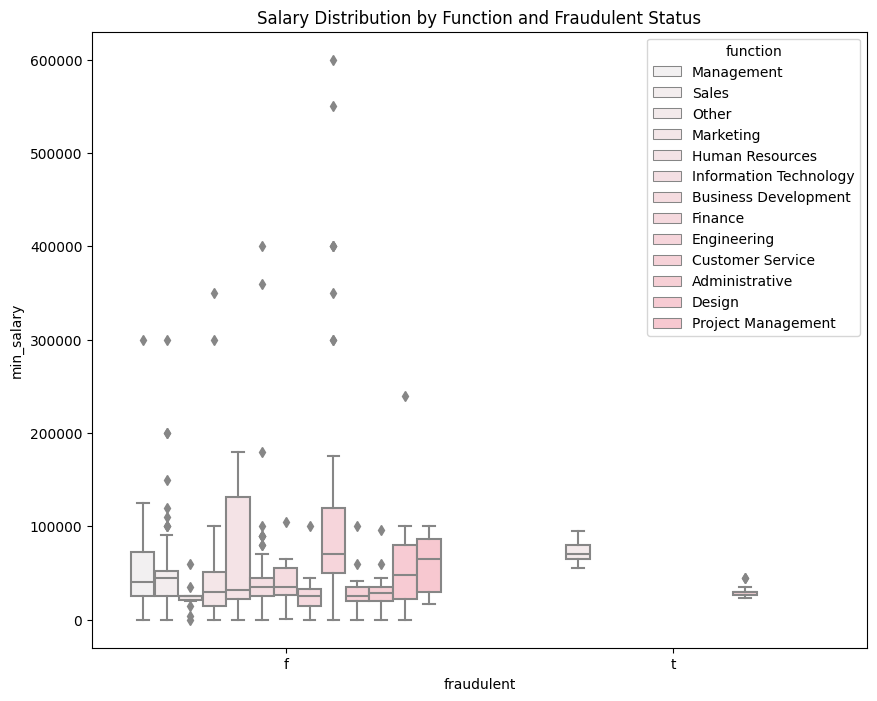

In [44]:
plt.figure(figsize=(10,8))
sns.boxplot(x='fraudulent', y='min_salary', hue='function', data=fraud_df, color='pink')
plt.title('Salary Distribution by Function and Fraudulent Status')
plt.show()

For the Outliers comparison, most of the boxplots have high outliers, and some low outliers. Its important to note that the real recruitments posts have the most outliers, whereas the fraudulent posts have little to no outliers that aren't significantly as large. 

So, based on the appropriate visuals and summary statistics, there does appear to be an assosiation with all of the variables. There are many distinct pairs between the box and violin plots. We can see some visible differences in the boxplots, for example, 'other' for real recruitment posts is a lot lower than fraudulent posts. There is a significant gap between the two and we can clearly see that real recruiment posts had both low and high outliers, whereas fraudulent recruiment posts had no outliers. Furthermore, 'customer service' for both the box and violin plots, we see there is no overlap and a significant gap. Real recruitment posts only have high outliers where as fraudulent posts had no outliers. When comparing for shape, it is evident within the numbers that fraudulent posts do not have the same measurement of center and shape when compared to their counterparts in the real posts. For example, the median for 'other' in real posts is 25000 whereas fraudulent posts had it at 70000. 
Therefore, the relationship between `fraudulent` and `salary` changes the context on the different values of `function` because we see exactly how different real posts are in comparison to fake. Based on the data we see that `function` gives more context on what the data looks like and how fraudulent types compare to real recruitment posts. 

## 5. Conclusion

Throughout this analysis, `fraudulent`, `salary`, and  `function` were analyzed for any relationship the variables might have. After further analysis, it was found that function does have a relationship with salary and fraudulent variables because of the gaps and overlaps the data has. The data is not constant with each other in a sense that some functions do no have the same shape, center, median, and outliers in they're fake or real. 

Admittidely, there is quiet a few shortcomings with this data analysis. First being that the overall dataset from Kraggle was full of null values. After the data cleaning, almost 97% of the data cut off for this analysis which could be concerning to the audience. This is because an overwhelming majority of the posts do not have the salary range posted in their recruitment posts. Furthermore, the audience may be skeptical to trust this analysis as some important data could have been cut off, such as any further relationships with `function` and `fraudulent`. However, it is difficult to prove that counter-argument as the rest of the data as no salary posted so we can't tell for sure. Moreover, 2 significant outliers were cut out of this analysis because they skewed the data exponentially, having the mean raise up to 1e8. This is a significant cut as the median is significantly lower than that. The final shortcoming was that because the majority of the data was cut, the dataset is no longer as representative of the data compared to the 17,000 rows cut. Although this is true, I tried to keep as many outliers as possible to simulate what the actual dataset may have looked like.
These shortcomings may impact the audience in our research motivation might use the answer to our research question because it is difficult to take the data as conclusive if there's so many things that were cut out and not representative of the overwhelming majority. For all we know, the visualizations made are not representative of the actual relationship these variables have in real and fake recruitment posts. However, because we don't know the salaries of the cut data, we can also partially assume the data is as representative as possible. We can't possibly know the true relationship if the recruiment posts do not set a salary range and therefore, we could have to focus on just categorical variables. Additionaly, the salary was split into minimum and maximum salary and only the minimum salary was used for this analysis.

One idea that could be implemented for future work is finding a dataset that has more numerical variables that can factor in a relationship of fraud vs real recruitment posts. Although salary is a great variable for these types of analysis i.e (Looking at what fraudulent posts use as salary ranges to attract future applicants), more numerical numbers such as number of employees posted on the profile would be interested to compare to. If salary were to be used in future work, perhaps instead of chosing just minimum or maximum salary, it would be in the benefit to have an average between them and use that for analysis. 